## Linear Regression in visual


### Improt Necessities (Libraries)

In [48]:
# ----------------------
# 1. Data Manipulation
# ----------------------
import numpy as np      # Fundamental package for numerical operations in Python
import pandas as pd     # Provides powerful data structures (e.g., DataFrame) for data manipulation and analysis

# ----------------------
# 2. Visualization Libraries
# ----------------------
import matplotlib.pyplot as plt           # Core plotting library for static, animated, and interactive visualizations
from matplotlib import cm                 # Colormap support for color mapping in plots
from mpl_toolkits.mplot3d import Axes3D   # Toolkit for creating 3D plots

import seaborn as sns                     # Built on top of matplotlib; simplifies creation of statistical graphics

# ----------------------
# 3. Machine Learning & Statistical Modeling
# ----------------------
from sklearn.linear_model import LinearRegression  # Implements linear regression model using scikit-learn
import statsmodels.api as sm                         # Offers detailed statistical outputs for regression models

## Import Data

Imagine walking into a grocery store every December since 1980 and buying a pound of apples. How much would that have cost you from year to year?

The price hasn’t followed a smooth or predictable path — it’s fluctuated quite a bit over time. However, when you look at the long-term trend, one thing becomes clear: apples have generally become more expensive.


In [59]:
# Raw data
data = {
    'Year': [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
             2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,
             2019, 2020],
    'Price': [0.45,0.39,0.46,0.37,0.52,0.50,0.50,0.52,0.56,0.53,0.56,0.65,0.52,0.56,0.55,0.64,0.59,0.58,0.61,0.64,
              0.62,0.71,0.74,0.86,0.87,0.89,0.96,0.91,0.93,0.93,1.02,0.98,1.04,1.13,1.25,1.23,1.17,1.32,1.39,
              1.42, 1.46],  # Estimated prices for 2019 and 2020
    "Rainfall": [50.17,44.87,62.58,66.26,50.21,53.73,54.39,54.74,54.27,50.39,43.53,64.47,58.09,51.17,66.8,61.46,
                 55.73,62.63,58.14,51.12,43.16,54.56,59.49,61.11,59.22,62.75,42.63,45.21,55.12,56.05,49.19,
                 48.99,55.51,59.8,59.13,52.86,52.99,58.52,60.52,
                 57.2, 60.1]  # Placeholder rainfall values for 2019–2020
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display basic info
print("Original DataFrame:\n")
print(df.head())

Original DataFrame:

   Year  Price  Rainfall
0  1980   0.45     50.17
1  1981   0.39     44.87
2  1982   0.46     62.58
3  1983   0.37     66.26
4  1984   0.52     50.21


In [60]:
data = pd.DataFrame(data, columns = ['Year', 'Price','Rainfall'])
data.head()

,Year,Price,Rainfall
0,1980,0.45,50.17
1,1981,0.39,44.87
2,1982,0.46,62.58
3,1983,0.37,66.26
4,1984,0.52,50.21


<ipython-input-61-2dad8e12f510>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= data["Year"], y= data["Price"], palette= 'muted')


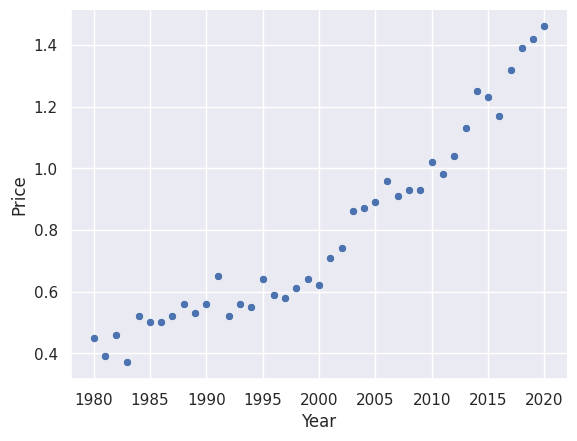

In [61]:


# Set the global aesthetic style using Seaborn's default settings
sns.set()  # Applies a clean, modern style to all plots

# Create a scatter plot to visualize Price over Year
# - x: The independent variable (Year)
# - y: The dependent variable (Price)
# - palette='muted': Uses Seaborn's 'muted' color palette for better visual appeal and accessibility
sns.scatterplot(x= data["Year"], y= data["Price"], palette= 'muted')

# Improve the plot aesthetics by removing top and right borders (spines)
sns.despine()

# Display the final plot
plt.show()

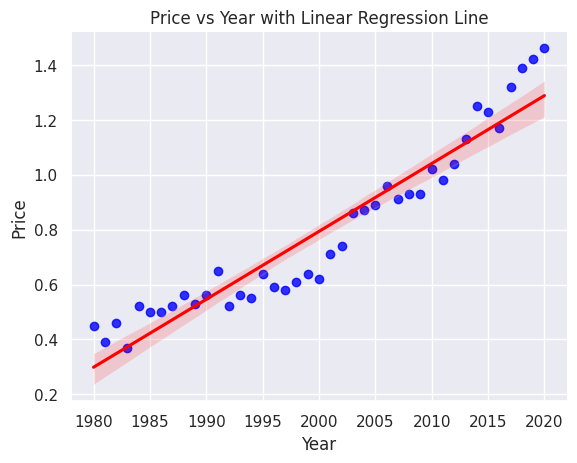

In [69]:
# Set style
sns.set()

# Create scatter plot with regression line
sns.regplot(x='Year', y='Price', data=data,
            scatter_kws={'color': 'blue'},
            line_kws={'color': 'red', 'linestyle': '-'})

# Add labels and title
plt.title('Price vs Year with Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Price')

# Clean up borders
sns.despine()

# Show the plot
plt.show()

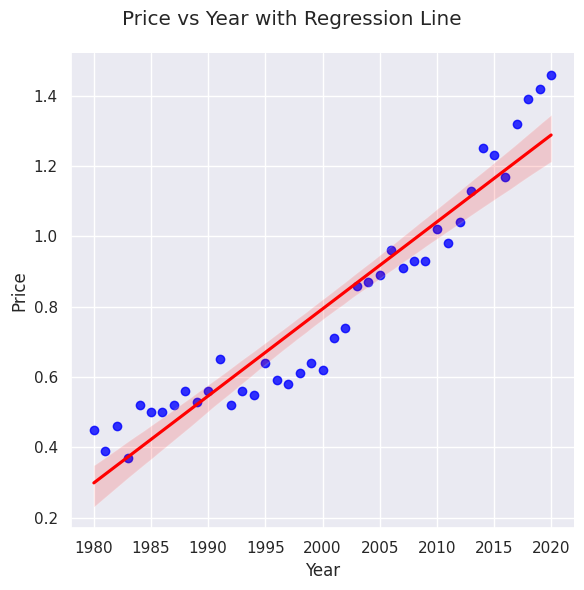

In [66]:
# High-level interface with built-in regression
sns.lmplot(x='Year', y='Price', data=data, height=6,
           scatter_kws={'color': 'blue'},
           line_kws={'color': 'red'})

plt.suptitle('Price vs Year with Regression Line')
sns.despine()
plt.tight_layout()
plt.show()

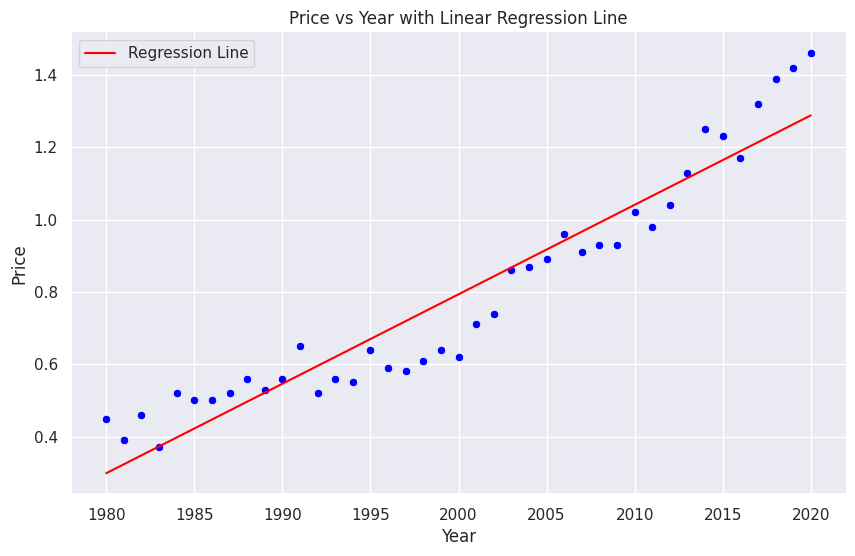

In [68]:
# Set style
sns.set()

# Plot scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Year"], y=data["Price"], color='blue')

# Fit model
X = data['Year'].values.reshape(-1, 1)
y = data['Price'].values
model = LinearRegression()
model.fit(X, y)

# Predict and plot regression line
y_pred = model.predict(X)
plt.plot(data['Year'], y_pred, color='red', linestyle='-', label='Regression Line')

# Labels and layout
plt.title('Price vs Year with Linear Regression Line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
sns.despine()
plt.show()

## Errors

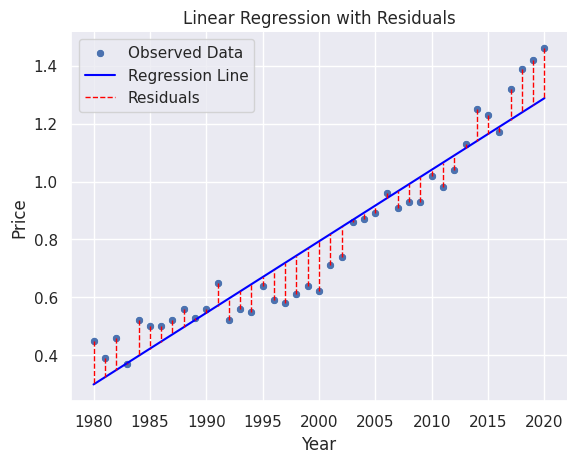

In [62]:
# Fit the linear regression model
model = LinearRegression()
model.fit(data["Year"].values.reshape(-1, 1), data["Price"].values.reshape(-1, 1))

# Create scatterplot of observed data
ax = sns.scatterplot(x=data["Year"], y=data["Price"], label="Observed Data")

# Overlay regression line
sns.lineplot(
    x=data["Year"],
    y=model.predict(data["Year"].values.reshape(-1, 1)).flatten(),
    color='blue',
    label='Regression Line',
    ax=ax
)

# Plot residual lines (difference between actual and predicted values)
for i in range(len(data)):
    plt.plot(
        [data["Year"].iloc[i], data["Year"].iloc[i]],  # Vertical line x-coordinates
        [data["Price"].iloc[i],                        # Actual vs Predicted y-values
         model.predict(data["Year"].iloc[i].reshape(1, -1))[0, 0]],
        color='red',
        linestyle='--',
        linewidth=1,
        label='Residuals' if i == 0 else ""  # Only add label once
    )

# Set axis labels and title
ax.set(xlabel="Year", ylabel="Price")
plt.title("Linear Regression with Residuals")

# Show the legend
# Using loc='best' lets Python decide the best placement automatically
plt.legend(loc='best')

# Remove top/right borders for cleaner look
sns.despine()

# Display the final plot
plt.show()

## Multiple Variables

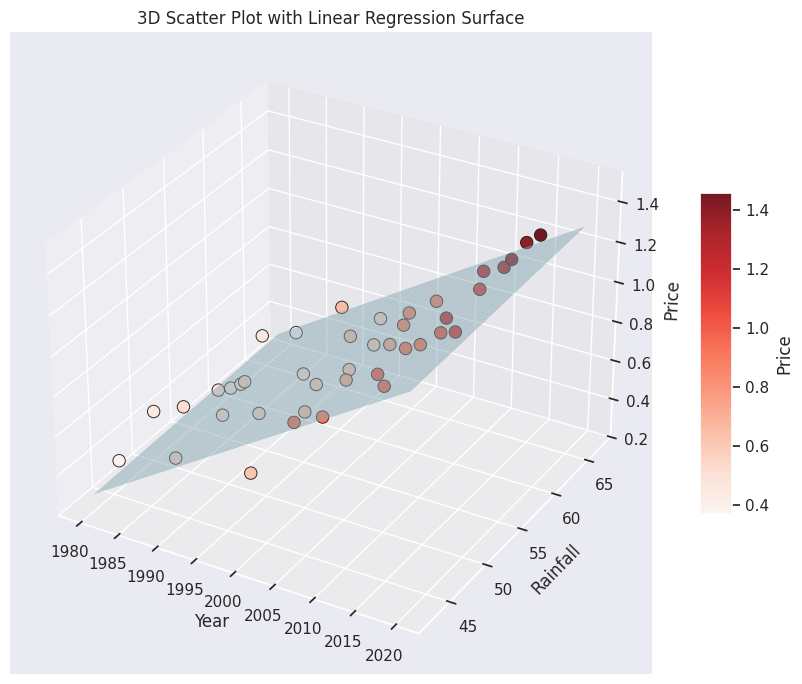

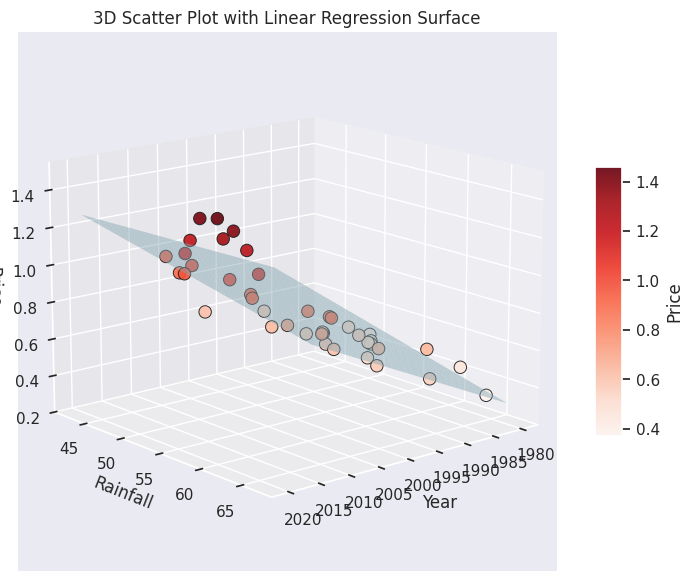

In [87]:
# Assuming we have a DataFrame called 'data' with three columns:
# - Year (predictor variable)
# - Rainfall (another predictor variable)
# - Price (target/response variable)

# Fit a multiple linear regression model using two features: 'Year' and 'Rainfall'
model = LinearRegression()
X = data[['Year', 'Rainfall']].values       # Features matrix (2D array)
y = data['Price'].values                    # Target vector
model.fit(X, y)                             # Train the model on the data

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(10, 7))           # Set figure size for better readability
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

# Plot the actual data points in 3D space
sc = ax.scatter(
    data['Year'],
    data['Rainfall'],
    data['Price'],
    c=data['Price'],                        # Color based on Price values
    cmap='Reds',                            # Use a red color map
    s=80,                                   # Size of each point
    edgecolor='k',                          # Black edge for contrast
    linewidth=0.7,
    alpha=0.9,                              # Slight transparency for clarity
    label='Data Points'
)

# Generate a grid of values to visualize the regression plane
x_surf = np.linspace(data['Year'].min(), data['Year'].max(), 30)   # Range of Year values
y_surf = np.linspace(data['Rainfall'].min(), data['Rainfall'].max(), 30)  # Range of Rainfall values
x_surf, y_surf = np.meshgrid(x_surf, y_surf)  # Create a meshgrid for surface plotting

# Combine x and y grids into a feature matrix and predict z (Price)
xy_surf = np.column_stack([x_surf.ravel(), y_surf.ravel()])  # Flatten and stack into pairs
z_surf = model.predict(xy_surf).reshape(x_surf.shape)        # Predict and reshape back to grid shape

# Plot the regression plane (surface)
ax.plot_surface(
    x_surf,
    y_surf,
    z_surf,
    color='lightblue',   # Surface color
    alpha=0.5,           # Partial transparency
    edgecolor='none'     # No edges between surface triangles
)

# Label the axes clearly
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.set_zlabel('Price')

# Add a color bar to show the mapping from color to Price values
cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Price')

# Add a title to the plot
plt.title('3D Scatter Plot with Linear Regression Surface')

# 🔍 Change the view angle here
ax.view_init(elev=15, azim=50)  # Try changing these numbers to adjust the view!

# Display the final 3D plot
plt.show()